In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)
df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


Text(0.5, 1.0, 'Original data')

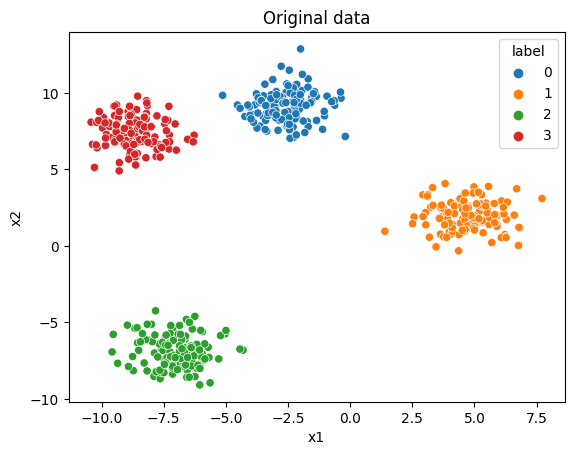

In [33]:
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "label", palette="tab10")
plt.title("Original data")

In [36]:
# remove label to simulate unsupervised learning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

Text(0.5, 1.0, 'Scaled X with feature standardization (no labels)')

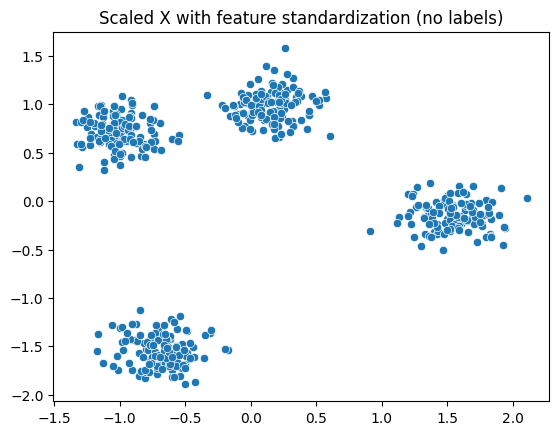

In [40]:
sns.scatterplot(x = scaled_X[:,0], y = scaled_X[:,1])
plt.title("Scaled X with feature standardization (no labels)")

## k-mean

In [44]:
from sklearn.cluster import KMeans

clusters = range(1,10)
sum_squared_distance = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_squared_distance

[999.9999999999993,
 522.1570539287738,
 116.09567852755526,
 28.78693897887401,
 26.22333826509207,
 23.27564711607088,
 21.383698082402397,
 18.818060191536517,
 17.916297422523115]

Text(0.5, 1.0, 'Elbow plot to find k')

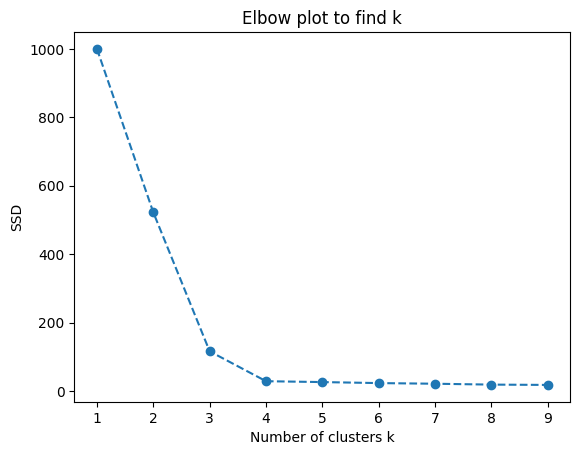

In [48]:
plt.plot(clusters, sum_squared_distance, '--o')
plt.xlabel("Number of clusters k")
plt.ylabel("SSD")
plt.title("Elbow plot to find k")

In [49]:
pd.Series(sum_squared_distance).diff()

0           NaN
1   -477.842946
2   -406.061375
3    -87.308740
4     -2.563601
5     -2.947691
6     -1.891949
7     -2.565638
8     -0.901763
dtype: float64

## Silhouette

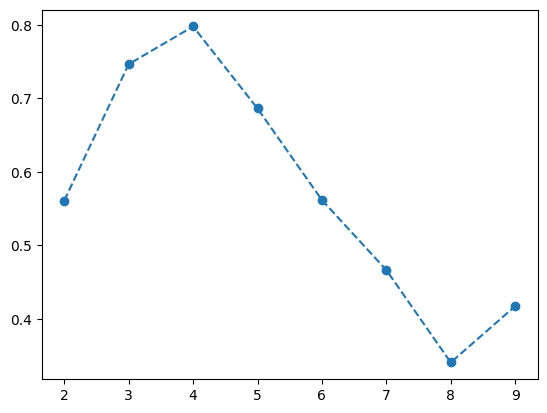

In [86]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init = "auto").fit(scaled_X) for k in clusters]
# kmeans[3].inertia_
# kmeans[3].labels_

silhouette_score = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
silhouette_score
plt.plot(clusters[1:], silhouette_score, '--o')

## Visualization

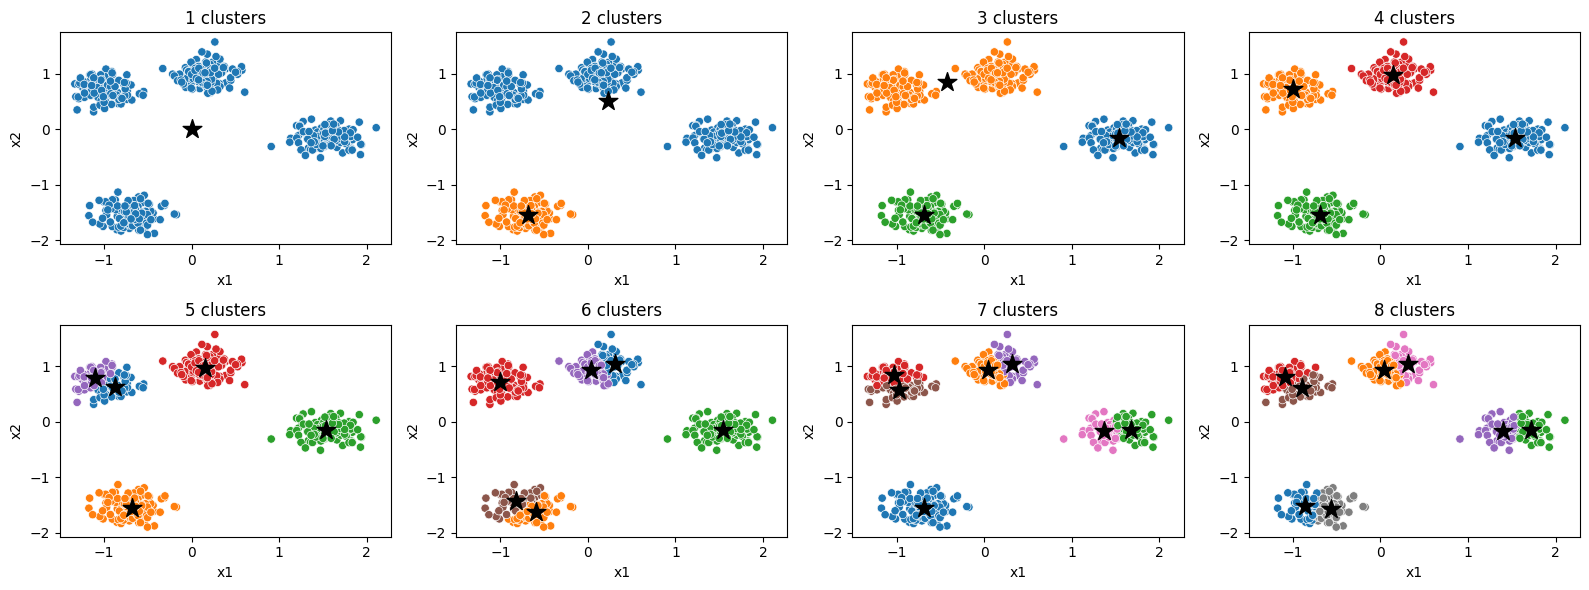

In [87]:
fig, axes = plt.subplots(2,4, figsize = (16,6))
# number_plots = (len(clusters)/2)
# number_plots

df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

for i, ax in enumerate(axes.flatten()):
    clusters_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data = df_plot, x = "x1", y = "x2", hue = "label", ax = ax, palette = "tab10")
    ax.scatter(clusters_centers[:,0], clusters_centers[:,1], s = 200, marker = "*", color = "black")

    ax.legend([],[], frameon = False)
    ax.set(title = f"{i+1} clusters")

fig.tight_layout()

In [83]:
kmeans[3].cluster_centers_

array([[ 0.14957993,  0.98016683],
       [-0.68486276, -1.54855438],
       [ 1.53895017, -0.15301193],
       [-1.00366735,  0.72139948]])